In [1]:
!ls

Untitled.ipynb      Untitled1.ipynb     hackathon_20mil.csv hackathon_20mil.zip


In [54]:
import pandas as pd
import numpy as np
%matplotlib inline
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./hackathon_20mil.csv", sep=";")

In [92]:
len(data["RUNID"].unique())

1039

delete columns

In [1]:
# data.drop(data.columns[[1]], axis=1, inplace=True)

In [8]:
def write(f, line):
    f.write(str(line) + '\n')
def to_file(path, data):
    """
        creates file at path
        format:
        -----
        n
        k1 RUNID1 
        a11 a12 a13 ... a1(k1)
        ...
        kn RUNIDn
        an1 an2 an3 ... an(kn)
        -----
        where 
            n = number of RUNID
            ai = line with LINENO at RUNIDi
    """
    

In [74]:
to_file("./tests/test_small.txt", data[:100000])

In [57]:
!du -sh tests/*

5.5M	tests/test1.txt


In [54]:
!wc -l tests/test1.txt

      13 tests/test1.txt


In [71]:
!pwd

/Users/istar/Desktop/hack


In [75]:
!cat "./tests/test_small.txt"

6
159 130264
1 6 7 8 12 15 16 19 20 25 27 28 30 31 32 34 37 43 49 57 63 65 67 69 75 76 77 78 79 80 81 85 86 87 92 93 94 97 99 100 101 104 105 106 107 108 109 110 111 113 114 115 116 117 120 121 122 123 124 125 126 127 128 129 131 133 135 141 147 152 153 157 214 226 227 262 461 468 473 476 477 480 515 520 525 529 534 539 541 542 543 548 646 745 849 860 866 868 892 907 926 1150 1165 1169 1171 1539 1543 3189 3212 3213 3214 3216 3237 3238 3239 3240 3241 3242 3243 3244 3245 3246 3247 3250 3254 3255 3277 3287 3288 3289 3294 3296 3297 3300 3304 3308 3309 3310 3314 3318 3319 3323 3330 3331 3335 3342 3343 3347 3375 3376 3381 3560 3561 3563 3564 3565 3566 3567 3795
285 130314
1 2 3 5 9 11 12 14 15 16 17 19 20 22 25 26 27 28 29 30 31 32 35 36 37 39 40 41 42 43 45 48 49 55 57 58 59 60 61 67 68 69 70 71 72 73 74 75 77 80 81 87 90 91 92 93 99 100 101 104 105 109 110 112 113 115 116 117 121 123 124 125 126 127 128 129 131 132 133 135 137 141 144 146 147 148 149 150 151 152 153 154 155 156 157 158 159

In [188]:
my_n = len(lens)
my_n

1039

давайте нагенерим кучу тестов

In [13]:
def save_auto_gen(path, data_auto):
    with open(path, "w") as f:
        write(f, len(data_auto))
        for x,i in enumerate(data_auto):
            write(f, str(len(i)) + ' ' + str(x))
            write(f, " ".join(map(str, list(i))))

потестируем алгоритм на увеличение числа столбцов

In [23]:
def get_n_tests_with_rise_of_cols(len_distribution, n=100):
    m_max = 1000000
    m = m_max / n
    for i in range(n):
        data_autogen = []
        for l in len_distribution:
            data_autogen.append(np.random.randint(0, m, size=l))
        path = "tests/test_autogen_"+str(i)
        save_auto_gen(path, data_autogen)
        m = m + m_max / n

In [24]:
get_n_tests_with_rise_of_cols(lens, n=100)

In [32]:
import re

In [61]:
times = []
for i in range(100):
    with open("tests/answers/test_autogen_answer"+str(i), "r") as f:
        ar = f.readlines()
        time = ar[-1]
        time = float(re.findall("\d+\.\d+", time)[0])
        times.append(time)

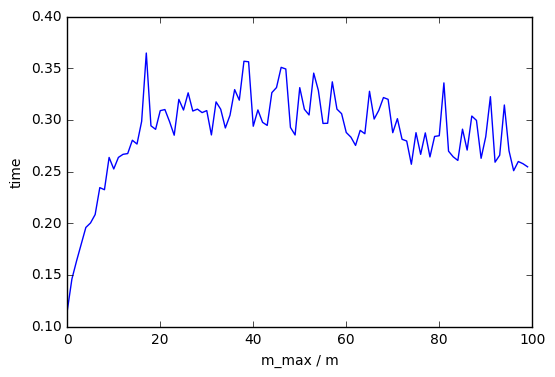

In [62]:
# greedy
plt.xlabel("m_max / m")
plt.ylabel("time")
plt.plot(times)

In [25]:
def get_n_tests_with_rise_of_rows(len_distribution):
    m = 1000000
    col_size = 0.1
    n = 10
    for i in range(n):
        data_autogen = []
        for l in len_distribution[:int(len(len_distribution)*col_size)]:
            data_autogen.append(np.random.randint(0, m, size=l))
        path = "tests/test_autogen_n_"+str(i)
        save_auto_gen(path, data_autogen)
        col_size += 0.1

In [27]:
get_n_tests_with_rise_of_rows(lens)

In [64]:
times_n_ = []
for i in range(10):
    with open("tests/answers/test_autogen_answer_n_"+str(i), "r") as f:
        ar = f.readlines()
        time = ar[-1]
        time = float(re.findall("\d+\.\d+", time)[0])
        times_n_.append(time)

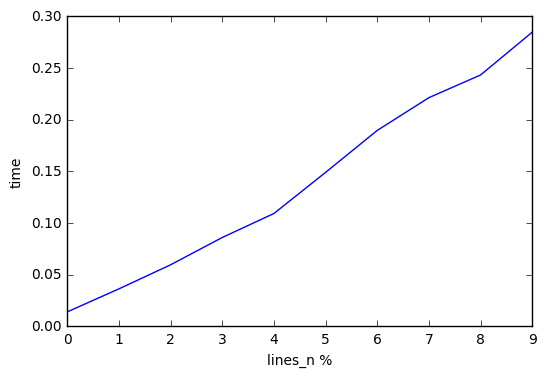

In [67]:
# greedy
plt.xlabel("lines_n %")
plt.ylabel("time")
plt.plot(times_n_)

нарисуем теперь такие же графики для одной итерации локального спуска

In [68]:
times_n_ = []
for i in range(10):
    with open("tests/answers/test_local_answer_n_"+str(i), "r") as f:
        ar = f.readlines()
        time = ar[-1]
        time = float(re.findall("\d+\.\d+", time)[0])
        times_n_.append(time)

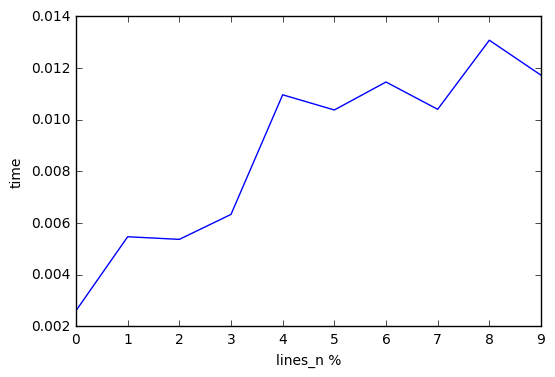

In [69]:
# local
plt.xlabel("lines_n %")
plt.ylabel("time")
plt.plot(times_n_)

In [72]:
times_n_ = []
for i in range(100):
    with open("tests/answers/test_local_answer_"+str(i), "r") as f:
        ar = f.readlines()
        time = ar[-1]
        time = float(re.findall("\d+\.\d+", time)[0])
        times_n_.append(time)

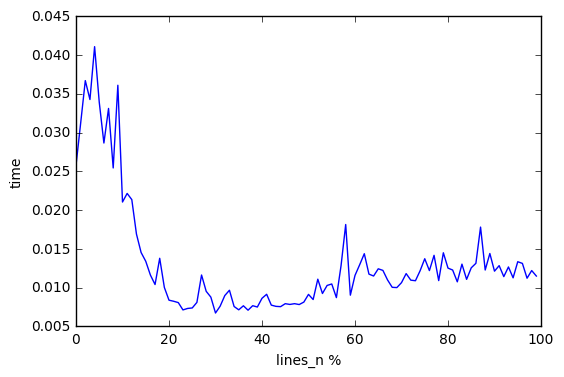

In [73]:
# local
plt.xlabel("max_m / m%")
plt.ylabel("time")
plt.plot(times_n_)

In [6]:
lens = []
diff_ids = data["RUNID"].unique()
for runid in tqdm(diff_ids):
    lineno = data[data["RUNID"] == runid]
    lineno = lineno[lineno["COUNT"] != 0]
    lineno = lineno["LINENO"]
    str_cur = list(map(str, sorted(np.unique(lineno))))
    cur_len = len(str_cur)  
    lens.append(cur_len)

100%|██████████| 1039/1039 [00:39<00:00, 26.44it/s]


(array([ 375.,  113.,  127.,   63.,  129.,   36.,   32.,    7.,    4.,
           1.,    6.,    2.,    6.,    0.,    0.,    3.,    5.,   26.,
           4.,    1.,    1.,    3.,    1.,    8.,    2.,    0.,    1.,
           3.,    1.,    2.,    3.,    1.,    0.,    0.,    1.,    1.,
           1.,    1.,    2.,    1.,    1.,    1.,    0.,    1.,    0.,
           0.,    0.,    0.,    1.,    1.,    2.,    9.,   26.,    7.,
           5.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           1.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    1.,    3.]),
 array([  1.40000000e+01,   1.64710000e+02,   3.15420000e+02,
          4.66130000e+02,   6.16840000e+02,   7.67550000e+02,
          9.18260000e+02,   1.06897000e+03,   1.21968000e+03,
          1.37039000e+03

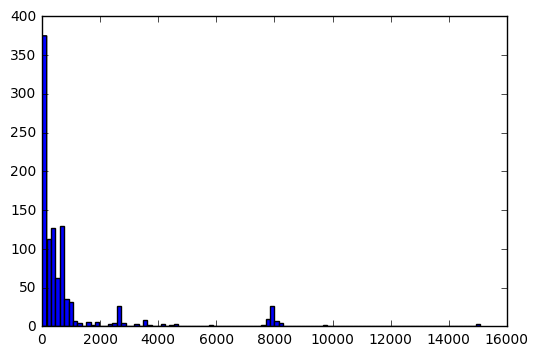

In [98]:
plt.hist(lens, bins=100)

## Локальный поиск

- 0.035156 время спуска для n, m = 1039 34074
- mean answer is 69.6
- best answer is 69 (greedy algorythm)